In [2]:
import matplotlib.pyplot as plt
import torch

# A simple example

We want to fit a line to some data so that we can make future predictions.

For example: how tall will this flower grow based on distance from the equator?

Let's make some fake data for this.

## Clean Data

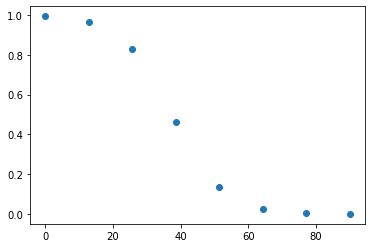

In [178]:
def unknown_true_height_function(dist):
    return torch.sigmoid(-dist*12/90+5)

num_samples = 8
dist_from_equator = torch.linspace(0, 90, num_samples)
flower_height = unknown_true_height_function(dist_from_equator)

plt.plot(dist_from_equator, flower_height, 'o');

In [211]:
x = dist_from_equator/90
y = flower_height

poly_order = 4
powers = torch.tensor([p+1 for p in range(poly_order)])
x_poly = x.unsqueeze(-1).pow(powers)

num_epochs = 10000

model = torch.nn.Sequential(torch.nn.Linear(poly_order, 1), torch.nn.Flatten(0, 1))
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

for epoch in range(num_epochs):
    yhat = model(x_poly)
    loss = loss_func(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch == 0 or epoch % 1000 == 0:
        print(epoch, loss.item())

0 0.5915951132774353
1000 0.09191892296075821
2000 0.034210145473480225
3000 0.011530587449669838
4000 0.006384077947586775
5000 0.005627812817692757
6000 0.005099446512758732
7000 0.004545989446341991
8000 0.004091082140803337
9000 0.0038151212502270937


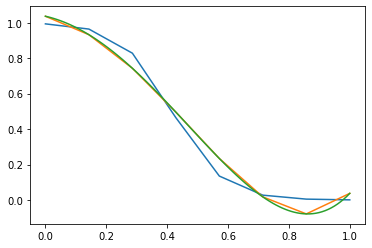

In [212]:
with torch.no_grad():
    plt.plot(x, y)
    plt.plot(x, model(x_poly))

    x_valid = torch.linspace(0, 1, 100)
    x_valid_poly = x_valid.unsqueeze(-1).pow(powers)
    y_valid = model(x_valid_poly)
    plt.plot(x_valid, y_valid)

In [210]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.6032, -0.3692, -0.0954,  0.1079]], requires_grad=True),
 Parameter containing:
 tensor([0.8407], requires_grad=True)]

Let's fit a fifth order polynomial:

$$
\hat y = a_5 x^5 + a_4 x^4 + a_3 x^3 + a_2 x^2 + a_1 x^1 + a_0 x^0
$$

## Noisy Data

In [ ]:
def unknown_true_height_function(dist):
    return torch.sigmoid(-dist*12/90+5)

num_samples = 8
dist_from_equator = torch.clip(torch.linspace(0, 90, num_samples) + torch.randn(num_samples) * 8, 0, 90)
flower_height = unknown_true_height_function(dist_from_equator)

plt.plot(dist_from_equator, flower_height, 'o');

tensor([[-0.6840],
        [ 1.2805],
        [-0.4671],
        [-0.3929]])

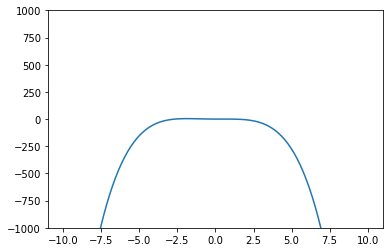

In [387]:
x = torch.linspace(-10, 10, 100)

poly_order = 4
powers = torch.tensor([p + 1 for p in range(poly_order)])
x_poly = x.unsqueeze(-1).pow(powers)

coefficients = torch.randn(poly_order, 1) * 1

y = x_poly @ coefficients

plt.plot(x, y);
plt.ylim([-1000, 1000])

coefficients

In [254]:
coefficients

tensor([[0.8452],
        [0.4135],
        [0.1591],
        [0.5240]])